Data Cleaning

Elaborado por: Martín Ordóñez

* Actualizado al 17/01/2022

In [1]:
import pandas as pd

In [2]:
# determinar directorio
os.chdir('/Users/matin/Library/Mobile Documents/com~apple~CloudDocs/Coding Dojo Python/Proyecto I')
os.getcwd()

'/Users/matin/Library/Mobile Documents/com~apple~CloudDocs/Coding Dojo Python/Proyecto I'

In [3]:
# Cargar datos
df = pd.read_csv('sales_predictions.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df.Item_Identifier.value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [7]:
df.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [8]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


La información faltante puede estar en otras filas 

In [9]:
pip install -U scikit-learn scipy matplotlib

Requirement already up-to-date: scikit-learn in /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages (1.0.2)
Requirement already up-to-date: scipy in /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages (1.7.3)
Requirement already up-to-date: matplotlib in /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages (3.5.1)
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [10]:
from sklearn.impute import SimpleImputer

Se imputará los datos con la media por el identificador de producto y local

In [11]:
df['Item_Weight'] = df['Item_Weight'].fillna(df.groupby('Item_Identifier')['Item_Weight'].transform('mean'))

In [12]:
df['Item_Weight'].isna().sum()

4

In [14]:
df['Item_Weight'] = df['Item_Weight'].fillna('mean')

In [15]:
df['Item_Weight'].isna().sum()

0

In [16]:
df['Outlet_Identifier'].isna().sum()

0

In [17]:
df.groupby(['Outlet_Identifier'])['Outlet_Size'].min()

Outlet_Identifier
OUT010       NaN
OUT013      High
OUT017       NaN
OUT018    Medium
OUT019     Small
OUT027    Medium
OUT035     Small
OUT045       NaN
OUT046     Small
OUT049    Medium
Name: Outlet_Size, dtype: object

In [25]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(df.groupby('Outlet_Identifier')['Outlet_Size'].min())

In [26]:
df['Outlet_Size'].isna().sum()

2410

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   object 
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 799.2+ KB


In [31]:
df.groupby('Outlet_Identifier')['Outlet_Size'].min()

Outlet_Identifier
OUT010       NaN
OUT013      High
OUT017       NaN
OUT018    Medium
OUT019     Small
OUT027    Medium
OUT035     Small
OUT045       NaN
OUT046     Small
OUT049    Medium
Name: Outlet_Size, dtype: object

In [32]:
import numpy as np

In [38]:
df.Outlet_Size = df['Outlet_Size'].fillna(df.groupby('Outlet_Identifier')['Outlet_Size'].transform('min'))

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   object 
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 799.2+ KB


In [134]:
df.groupby('Outlet_Identifier')[['Outlet_Size', 'Item_Outlet_Sales']].max()

,Outlet_Size,Item_Outlet_Sales
Outlet_Identifier,,
OUT010,Medium,1775.6886
OUT013,High,10256.6490
OUT017,Medium,9664.7528
OUT018,Medium,6768.5228
OUT019,Small,1482.0708
OUT027,Medium,13086.9648
OUT035,Small,8479.6288
OUT045,Medium,8994.9580
OUT046,Small,9779.9362


In [132]:
df.groupby('Outlet_Size', 'Outlet_Identifier')[['Item_Outlet_Sales']].sum()

ValueError: No axis named Outlet_Identifier for object type DataFrame

In [47]:
def size(a):
    x = df['Outlet_Identifier']
    y = df['Outlet_Size']
    for i in x:
        if x == 'OUT010':
            y == 'Medium'
        elif x == 'OUT013':
            y == 'High'
        elif x == 'OUT017':
            y == 'Medium'
        elif x == 'OUT018':
            y == 'Medium'
        elif x == 'OUT019':
            y == 'Small'
        elif x == 'OUT027':
            y == 'Medium'
        elif x == 'OUT035':
            y == 'Small'
        elif x == 'OUT045':
            y == 'Medium'
        elif x == 'OUT046':
            y == 'Small'
        elif x == 'OUT049':
            y == 'Medium'

    return y



In [44]:
a = df.Outlet_Size


In [48]:
size(a)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [49]:
df['Outlet_Size'] = df.groupby('Outlet_Identifier')['Outlet_Size'].apply(lambda x: x.ffill().bfill())

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   object 
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 799.2+ KB


In [53]:
df['Outlet_Size'] = df['Outlet_Size'].fillna('Medium')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   object 
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 799.2+ KB


# Gráficos 

In [55]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.
Fontconfig warning: ignoring UTF-8: not a valid region tag


In [56]:
df.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


array([[<AxesSubplot:title={'center':'Item_Outlet_Sales'}>]], dtype=object)

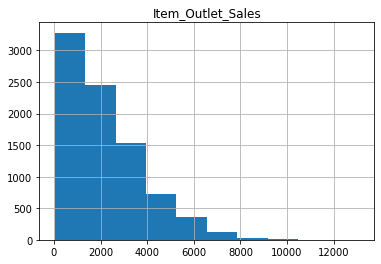

In [64]:
df.hist(column='Item_Outlet_Sales')

array([[<AxesSubplot:title={'center':'Item_Visibility'}>]], dtype=object)

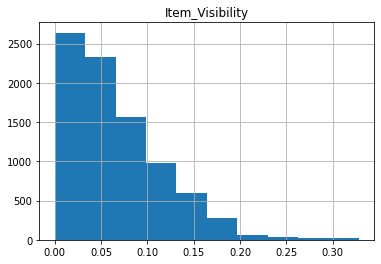

In [65]:
df.hist(column='Item_Visibility')

In [75]:
df['Item_Weight'] = pd.to_numeric(df['Item_Weight'], errors = 'coerce')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


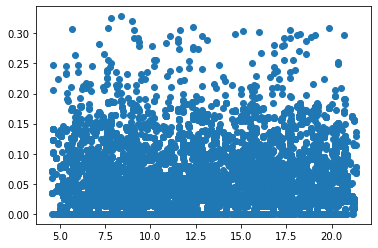

In [77]:
plt.scatter(df['Item_Weight'], df['Item_Visibility'])

In [80]:
df['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [79]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')

In [81]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')

In [82]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

In [84]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [86]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [95]:
df.groupby(['Outlet_Size'])[['Item_Outlet_Sales']].mean()

,Item_Outlet_Sales
Outlet_Size,
High,2298.995256
Medium,2283.730470
Small,1912.149161


In [109]:
x = ['High', 'Medium', 'Small']
y = [2298.995256, 2283.730470, 1912.149161]
colores = ['blue', 'orange', 'green']

In [107]:
from matplotlib import pyplot

Text(0.5, 0, 'Tamaño del local')

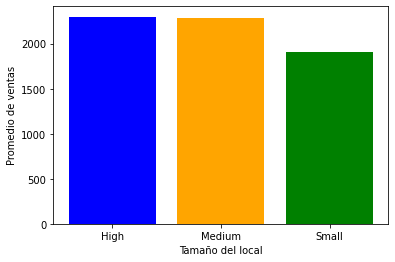

In [110]:
pyplot.bar(x, y, color = colores) 
pyplot.ylabel('Promedio de ventas')
pyplot.xlabel('Tamaño del local')



Text(0.5, 0, 'Tamaño del local')

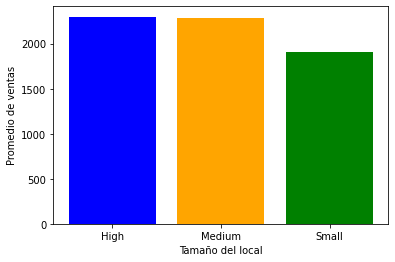

In [118]:
plt.bar(x, y, color = colores) 
plt.ylabel('Promedio de ventas')
plt.xlabel('Tamaño del local')


El promedio de ventas de los locales medianos es casi igual al promedio de ventas de los locales grandes

In [105]:
df.groupby(['Item_Fat_Content'])[['Item_Outlet_Sales']].mean()

,Item_Outlet_Sales
Item_Fat_Content,
Low Fat,2157.711534
Regular,2224.561170


{'whiskers': [<matplotlib.lines.Line2D at 0x12cd4c910>,
 'caps': [<matplotlib.lines.Line2D at 0x12cd4cd90>,
 'boxes': [<matplotlib.lines.Line2D at 0x12cd4c640>],
 'medians': [<matplotlib.lines.Line2D at 0x12cb07370>],
 'fliers': [<matplotlib.lines.Line2D at 0x12cb07640>],
 'means': []}

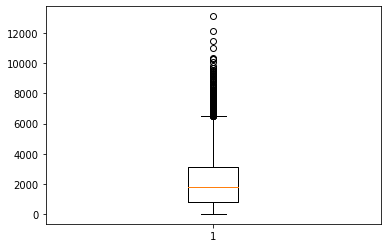

In [113]:
plt.boxplot(df.Item_Outlet_Sales)

Existe una gran cantidad de outliers

In [119]:
df.groupby(['Item_Fat_Content'])[['Item_Outlet_Sales']].mean()

,Item_Outlet_Sales
Item_Fat_Content,
Low Fat,2157.711534
Regular,2224.561170


In [123]:
x = ['Low Fat','Regular']
y = [2157.711534, 2224.561170]
colores = ['blue', 'orange'] 

Text(0.5, 0, 'contenido de grasa')

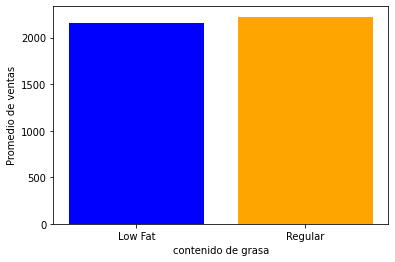

In [124]:
pyplot.bar(x, y, color = colores) 
pyplot.ylabel('Promedio de ventas')
pyplot.xlabel('contenido de grasa')

Casi no hay diferencia entre la venta de productos con bajo contenido de grasa y regular contenido de grasa

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [135]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [136]:
OUT027 = df[(df.Outlet_Identifier == 'OUT027')]

In [137]:
OUT013 = df[(df.Outlet_Identifier == 'OUT013')]
OUT049 = df[(df.Outlet_Identifier == 'OUT049')]
OUT046 = df[(df.Outlet_Identifier == 'OUT046')]
OUT035 = df[(df.Outlet_Identifier == 'OUT035')]
OUT045 = df[(df.Outlet_Identifier == 'OUT045')]
OUT018 = df[(df.Outlet_Identifier == 'OUT018')]
OUT017 = df[(df.Outlet_Identifier == 'OUT017')]
OUT010 = df[(df.Outlet_Identifier == 'OUT010')]
OUT019 = df[(df.Outlet_Identifier == 'OUT019')]

In [142]:
data = [OUT027['Item_Outlet_Sales'], OUT013['Item_Outlet_Sales'], OUT049['Item_Outlet_Sales'], 
OUT046['Item_Outlet_Sales'], OUT035['Item_Outlet_Sales'], OUT045['Item_Outlet_Sales'], OUT018['Item_Outlet_Sales'], 
OUT017['Item_Outlet_Sales'], OUT010['Item_Outlet_Sales'], OUT019['Item_Outlet_Sales']]

{'whiskers': [<matplotlib.lines.Line2D at 0x12e706eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x12e713490>,
 'boxes': [<matplotlib.lines.Line2D at 0x12e706be0>,
 'medians': [<matplotlib.lines.Line2D at 0x12e713a30>,
 'fliers': [<matplotlib.lines.Line2D at 0x12e713d00>,
 'means': []}

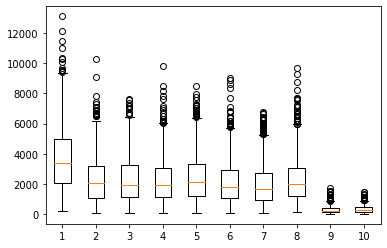

In [143]:
plt.boxplot(data)

In [148]:
names = [OUT027, OUT013, OUT049, 
OUT046, OUT035, OUT045, OUT018, 
OUT017, OUT010, OUT019]

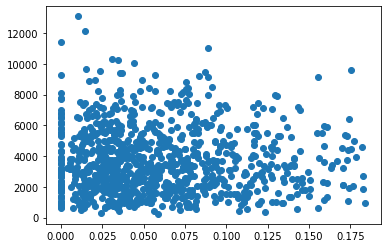

In [150]:
plt.scatter(OUT027['Item_Visibility'],OUT027['Item_Outlet_Sales'])